<a href="https://colab.research.google.com/github/ronakbihani123/supervised_ml_algorithms/blob/main/linear%26polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [ ]:
df = pd.get_dummies(df,columns=["sex","smoker","region"])

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
df.astype(np.int32)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


In [ ]:
x = df.drop(columns = ["charges"])
y = df["charges"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train , y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test , y_pred)

0.7835929767120722

In [ ]:
from sklearn.model_selection import RandomizedSearchCV                    #cv = cross validation = > apne data ko different different folders me divide krna cha re h
from sklearn.linear_model import Lasso

In [ ]:
param_dist = {"alpha" : [0.1,1.0,10.0,100.0,1000.0]}
lasso = Lasso()
random_search = RandomizedSearchCV(lasso , param_dist , n_iter=2 ,cv = 3)
random_search.fit(x_train , y_train)

RandomizedSearchCV(cv=3, estimator=Lasso(), n_iter=2,
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0,
                                                  1000.0]})

In [ ]:
y_pred_new = random_search.predict(x_test)

In [ ]:
r2_score(y_test , y_pred_new)

0.7830494474522629

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
param_grid = {"alpha" : [0.1,1.0,10.0,100.0,1000.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge , param_grid , cv = 3)
grid_search.fit(x_train , y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]})

In [ ]:
y_predicted = grid_search.predict(x_test)

In [ ]:
r2_score(y_test , y_predicted)

0.7834446266673823

In [ ]:
param_space = {'copy_X': [True,False], 'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}
grid_search = GridSearchCV(lr, param_space, cv=5)

In [ ]:
grid_search.fit(x_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
Best Score: 0.7331101109097584


In [ ]:
# Equation of simple line  = y = mx+b  -----> (x,y)-----> coordinates , m---> slope , b---> intercept

In [ ]:
# tips ---data ----> target column = total_bill ----> normallt --->fine tuning

In [ ]:
df =pd.read_csv("/content/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# df.head(2)
df = pd.get_dummies(df,columns=["sex","smoker","day","time"])
df.head(2)
df.astype(np.int32)

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16,1,2,1,0,1,0,0,0,1,0,1,0
1,10,1,3,0,1,1,0,0,0,1,0,1,0
2,21,3,3,0,1,1,0,0,0,1,0,1,0
3,23,3,2,0,1,1,0,0,0,1,0,1,0
4,24,3,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29,5,3,0,1,1,0,0,1,0,0,1,0
240,27,2,2,1,0,0,1,0,1,0,0,1,0
241,22,2,2,0,1,0,1,0,1,0,0,1,0
242,17,1,2,0,1,1,0,0,1,0,0,1,0


In [ ]:
x = df.drop(columns = ["total_bill"])
y = df["total_bill"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test  , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train , y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test , y_pred)

0.6240808714290971

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso

In [ ]:
param_dist = {"alpha" : [0.1,1.0,10.0,100.0,1000.0]}
lasso = Lasso()
random_search = RandomizedSearchCV(lasso , param_dist , n_iter=2 ,cv = 3)
random_search.fit(x_train , y_train)

RandomizedSearchCV(cv=3, estimator=Lasso(), n_iter=2,
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0,
                                                  1000.0]})

In [ ]:
y_pred_new = random_search.predict(x_test)

In [ ]:
r2_score(y_test , y_pred_new)

0.6310334486220416

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
param_grid = {"alpha" : [0.1,1.0,10.0,100.0,1000.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge , param_grid , cv = 3)
grid_search.fit(x_train , y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]})

In [ ]:
y_predicted = grid_search.predict(x_test)

In [ ]:
r2_score(y_test , y_predicted)

0.6224824038387665

In [ ]:
param_space = {'copy_X': [True,False], 'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}
grid_search = GridSearchCV(lr, param_space, cv=5)

In [ ]:
grid_search.fit(x_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}
Best Score: 0.5222120667372603


In [ ]:
# polynomial regression


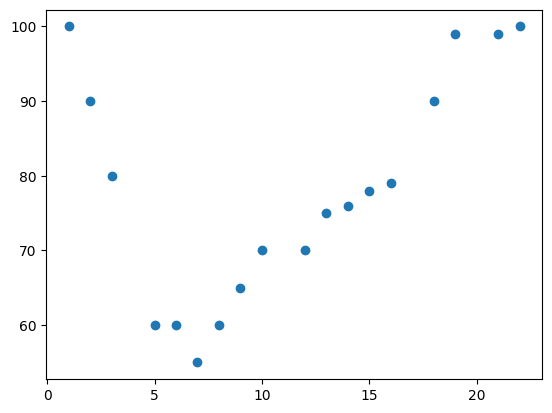

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x,y)
plt.show()

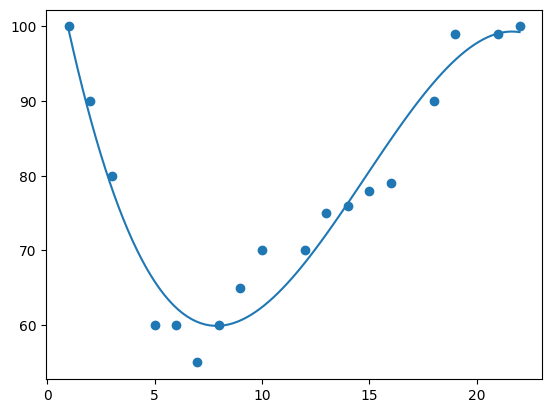

In [ ]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x,y,3))

myline = np.linspace(1,22,100)

plt.scatter(x,y)
plt.plot(myline , mymodel(myline))
plt.show()

In [ ]:
lr = LinearRegression()

In [ ]:
x_new = np.array(x).reshape(-1,1)

In [ ]:
lr.fit(x_new , y)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x_new)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

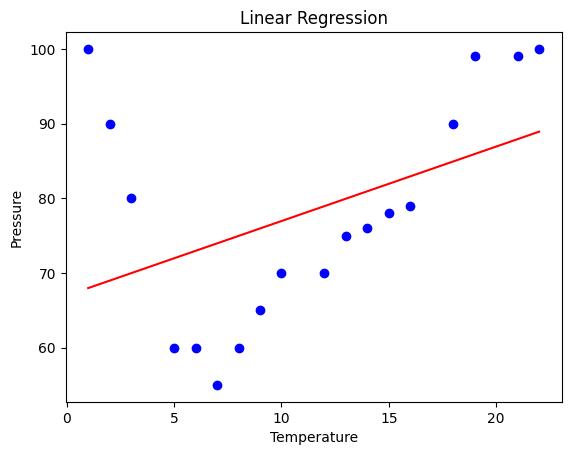

In [ ]:
plt.scatter(x_new, y, color='blue')

plt.plot(x_new, lr.predict(x_new), color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

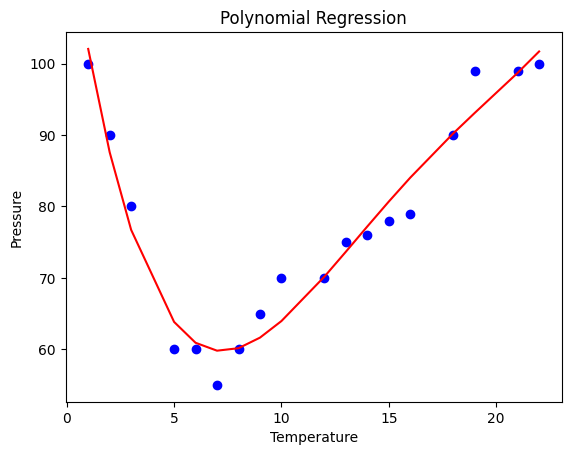

In [ ]:
plt.scatter(x_new, y, color='blue')

plt.plot(x_new, lin2.predict(poly.fit_transform(x_new)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()